# Note: This notebook runs using Google Colab.

In [1]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#different file
download = drive.CreateFile({'id': '1iwaXc_AqhyUhee2R_C7wSyeIRlRNpWH0'})
download.GetContentFile('instacart_combined_data.csv')

In [0]:
download = drive.CreateFile({'id': '1r7vuDif0MpOk9CQtveYCivX5xQhLt58J'})
download.GetContentFile('data_test.csv')

# Visual EDA

In [0]:
# We import the needed packages.
import pandas as pd
import numpy as np
from numpy import *

import math
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns
import scipy.stats as st

sns.set()
np.random.seed(55)


In [7]:
data_all = pd.read_csv('instacart_combined_data.csv')
data_all.head()

,user_id,order_number,add_to_cart_order,order_id,eval_set,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,aisle_id,department_id,aisle,department
0,1,1,1,2539329,prior,2,8,NaN,196,0,Soda,77,7,soft drinks,beverages
1,1,1,2,2539329,prior,2,8,NaN,14084,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,1,1,3,2539329,prior,2,8,NaN,12427,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,1,1,4,2539329,prior,2,8,NaN,26088,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,1,1,5,2539329,prior,2,8,NaN,26405,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


In [8]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
user_id                   int64
order_number              int64
add_to_cart_order         int64
order_id                  int64
eval_set                  object
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
product_id                int64
reordered                 int64
product_name              object
aisle_id                  int64
department_id             int64
aisle                     object
department                object
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [9]:
data_all.count()

user_id                   33819106
order_number              33819106
add_to_cart_order         33819106
order_id                  33819106
eval_set                  33819106
order_dow                 33819106
order_hour_of_day         33819106
days_since_prior_order    31741038
product_id                33819106
reordered                 33819106
product_name              33819106
aisle_id                  33819106
department_id             33819106
aisle                     33819106
department                33819106
dtype: int64

In [10]:
data_test = pd.read_csv('data_test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 8 columns):
Unnamed: 0                75000 non-null int64
order_id                  75000 non-null int64
user_id                   75000 non-null int64
eval_set                  75000 non-null object
order_number              75000 non-null int64
order_dow                 75000 non-null int64
order_hour_of_day         75000 non-null int64
days_since_prior_order    75000 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 4.6+ MB


__Users__

How many users in dataset?

In [11]:
print('number of users: ', len(data_all['user_id'].unique()))
print(data_all['eval_set'].unique())

number of users:  206209
['prior' 'train']


The total number of usesr is 206,209. They are in prior and train labels. Note, that test does not have users in the combined data, because these orders were held for competitions.



How many users in prior set?

Trian set? Test set?

In [12]:
eval_set = ['prior', 'train']

for set in eval_set:
  users = len(data_all[data_all['eval_set'] == set]['user_id'].unique())
  print('Set ', set, ' contains ', users, ' users.')

# test set
users_test = len(data_test['user_id'])
print('Set test contains ', users_test, ' users.' )

Set  prior  contains  206209  users.
Set  train  contains  131209  users.
Set test contains  75000  users.


We see that the number of users in prior and the sum of users in train and test are the same. 
This means that each user is either in prior and train and prior and test.

This is also the total number of users. We can calculate the total number of union of two sets is the sum of the elements of each set minus the number of elements in the intersection. Since the sum of the two sets __equals__ the total number, that means we subtract zero as number of users in the intersection.

Conclusion: each user belongs to prior and train sets or prior and test set.



__Orders__

How many orders?

In [13]:
print('Total number of orders: ', len(data_all['order_id'].unique()))

Total number of orders:  3346083


__Orders by day__

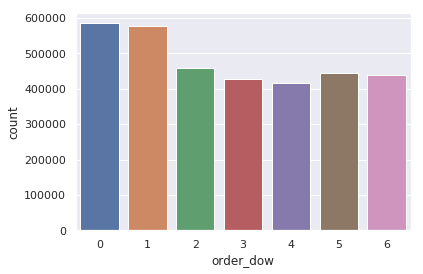

In [14]:
day = data_all[data_all['add_to_cart_order'] == 1]


sns.countplot(x='order_dow', data = day)
#sns.plt.title('Orders per day of week')


It looks like 0 and 1 are weekend days.

__Orders per hour of day__

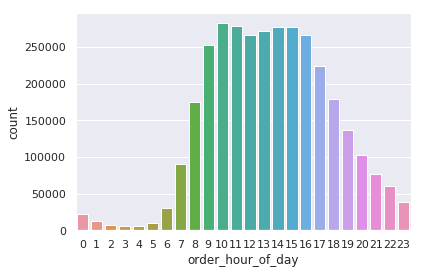

In [15]:
sns.countplot(x='order_hour_of_day', data=day)

We can unfold the graph above to see weekly activity.

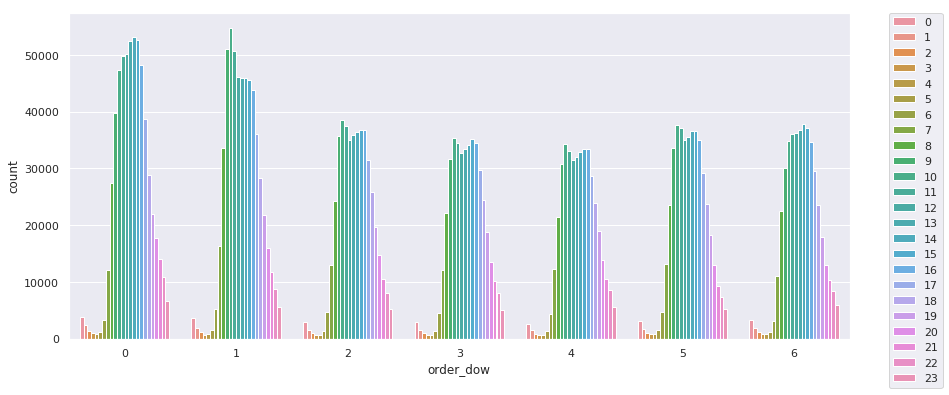

In [16]:
plt.figure(figsize =(14, 6) )
plt.xlabel('Weekly activity per day and hour')
plt.ylabel('Orders')

sns.countplot(x='order_dow', hue='order_hour_of_day', data=day)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can see that days 2 to 5 have different distribution than days 0, 1 and 6. All of them have dip in the middle of the day, which correspnds to lunch time. We have higher pic on day 1, but it is followed by dipper drop than on day 0. 

From these observations we may conclude that it is likely 0 to correspond to Saturday.

How many orders per user?

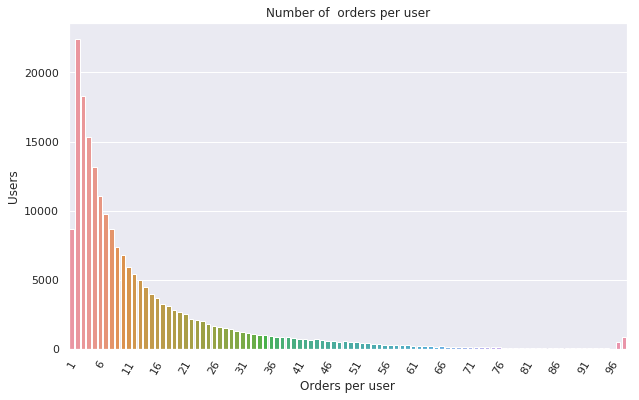

In [17]:
orders_per_user = data_all.groupby('user_id')['order_number'].aggregate(
    'max').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_per_user['order_number'].value_counts().index, 
            y=orders_per_user['order_number'].value_counts().values)

plt.xticks(range(0, 100, 5), range(1, 102, 5), rotation=60)
plt.xlabel('Orders per user')
plt.ylabel('Users')
plt.title('Number of  orders per user')
plt.show()

How many items in order?




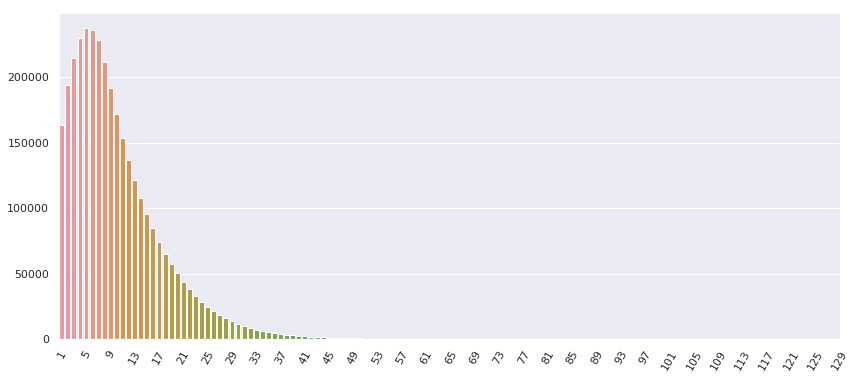

In [18]:
items_per_order = data_all.groupby('order_id')['add_to_cart_order'].aggregate(
    'max').reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x=items_per_order['add_to_cart_order'].value_counts().index,
             y=items_per_order['add_to_cart_order'].value_counts().values)
plt.xticks(range(0, 131, 4), range( 1, 132, 4), rotation=60)
plt.show()

How many days since prior order?

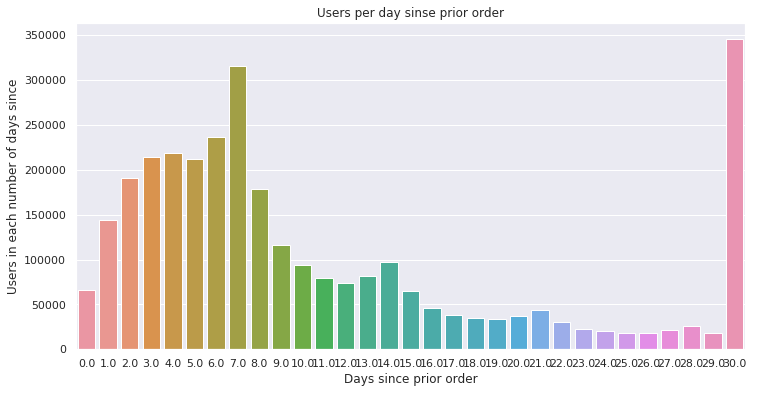

In [19]:
days_to_order = data_all.groupby('order_id')['days_since_prior_order'].aggregate(
    'max').reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=days_to_order['days_since_prior_order'].value_counts().index,
             y=days_to_order['days_since_prior_order'].value_counts().values)
plt.xlabel('Days since prior order')
plt.ylabel('Users in each number of days since')
plt.title('Users per day sinse prior order')
#plt.xticks(range(-1, 30, 2), range(0, 31, 2), rotation=60)
plt.show()


What is the range of days since prior order per user?

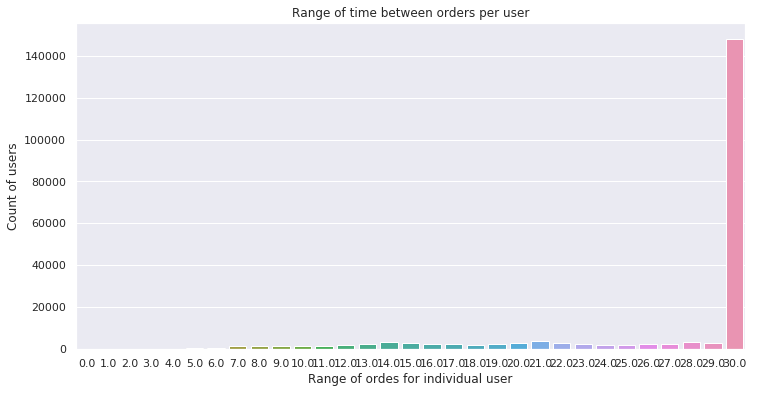

In [20]:
orders_range = data_all.groupby(['user_id'])['days_since_prior_order'].aggregate(
    'max').reset_index()

orders_range = orders_range.dropna()

plt.figure(figsize=(12, 6))
sns.barplot(x=orders_range['days_since_prior_order'].value_counts().index, 
            y=orders_range['days_since_prior_order'].value_counts().values)
plt.xlabel('Range of ordes for individual user')
plt.ylabel('Count of users')
plt.title('Range of time between orders per user')
plt.show()

Many users have reached the max of 30 days between orders. What about users with range below 30 days?

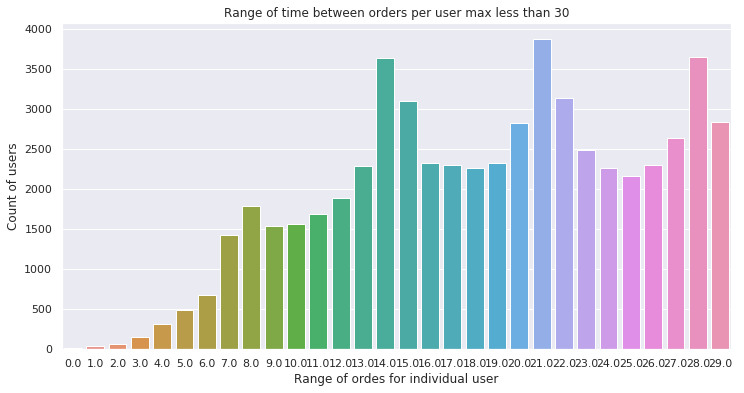

[3882 3652 3638 3135 3100 2843 2834 2645 2491 2334 2333 2306 2299 2289
 2263 2261 2165 1889 1788 1688 1567 1541 1430  681  497  310  150   70
   40   14]
58135


In [21]:
orders_range = orders_range[orders_range['days_since_prior_order'] < 30]

plt.figure(figsize=(12, 6))

z = orders_range['days_since_prior_order'].value_counts()

sns.barplot(x=z.index, y=z.values)
plt.xlabel('Range of ordes for individual user')
plt.ylabel('Count of users')
plt.title('Range of time between orders per user max less than 30')
plt.show()
print(z.values)
print(sum(z.values))

About 28% of customers order frequency order every 29 days or less. 

What about the minimum of the days since prior order?

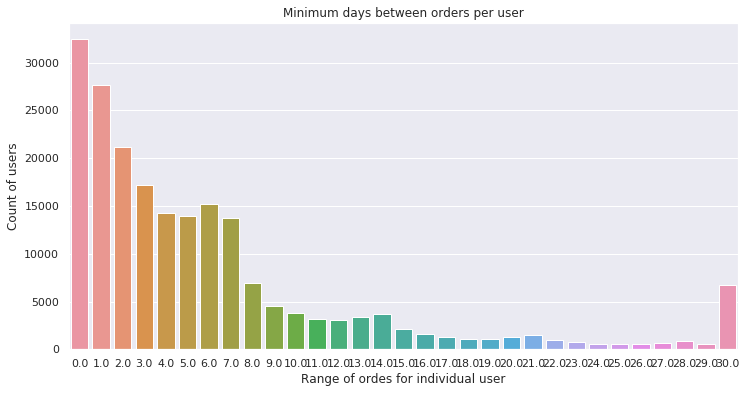

In [22]:
orders_range = data_all.groupby(['user_id'])['days_since_prior_order'].aggregate(
    'min').reset_index()

orders_range = orders_range.dropna()

plt.figure(figsize=(12, 6))
sns.barplot(x=orders_range['days_since_prior_order'].value_counts().index, 
            y=orders_range['days_since_prior_order'].value_counts().values)
plt.xlabel('Range of ordes for individual user')
plt.ylabel('Count of users')
plt.title('Minimum days between orders per user')
plt.show()

There is a big group, about 15% which at least placed two orders on the same day. About 3.5% of users order less frequently than once in 30 days. 

In the above graphs we see higher values around 7, 14, 21 and 28 days, both in range and lower bound of ordering.

__Items__

Which are most popular products?

What is the distribution of basket size?


In [23]:
products = data_all.groupby('product_name')['product_id'].count().sort_values(ascending=False)
products.head(30)

product_name
Banana                                  491291
Bag of Organic Bananas                  394930
Organic Strawberries                    275577
Organic Baby Spinach                    251705
Organic Hass Avocado                    220877
Organic Avocado                         184224
Large Lemon                             160792
Strawberries                            149445
Limes                                   146660
Organic Whole Milk                      142813
Organic Raspberries                     142603
Organic Yellow Onion                    117716
Organic Garlic                          113936
Organic Zucchini                        109412
Organic Blueberries                     105026
Cucumber Kirby                           99728
Organic Fuji Apple                       92889
Organic Lemon                            91251
Organic Grape Tomatoes                   88078
Apple Honeycrisp Organic                 87272
Seedless Red Grapes                      86748


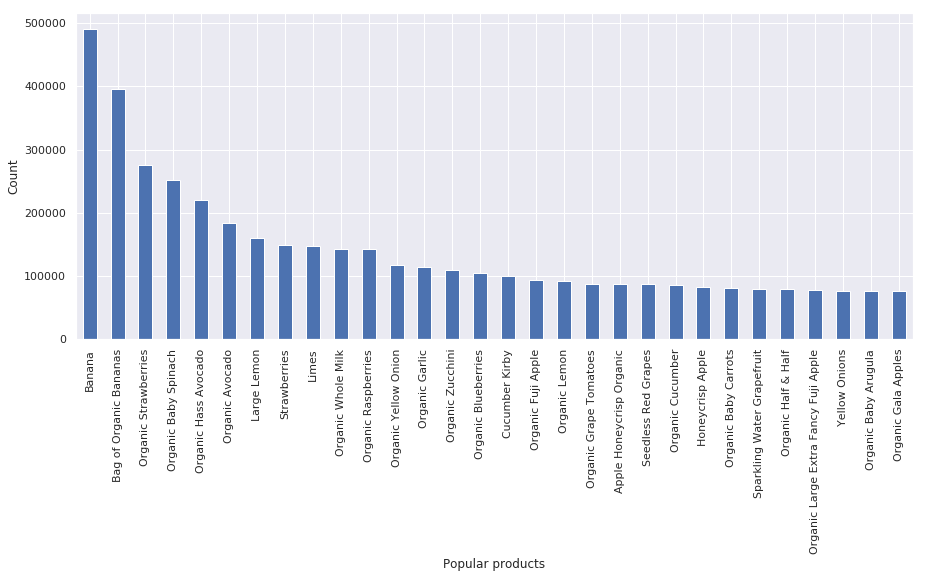

In [24]:
products.sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,6))
plt.xlabel('Popular products')
plt.ylabel('Count')
plt.show()

Which item is put first in the basket?

In [25]:
product_first = day.groupby('product_name')['product_id'].count().sort_values(ascending=False)
product_first.head(30)

product_name
Banana                             115521
Bag of Organic Bananas              82877
Organic Whole Milk                  32071
Organic Strawberries                28875
Organic Hass Avocado                24913
Organic Baby Spinach                24412
Organic Avocado                     23393
Spring Water                        17552
Strawberries                        17073
Organic Raspberries                 14950
Sparkling Water Grapefruit          14380
Organic Half & Half                 13073
Large Lemon                         12891
Soda                                12327
Organic Reduced Fat Milk            10242
Limes                               10092
Hass Avocados                        9952
Half & Half                          9847
Organic Reduced Fat 2% Milk          9644
Raspberries                          9320
Organic Blueberries                  9133
Organic Fuji Apple                   9084
Unsweetened Almondmilk               8913
Apple Honeycrisp Orga

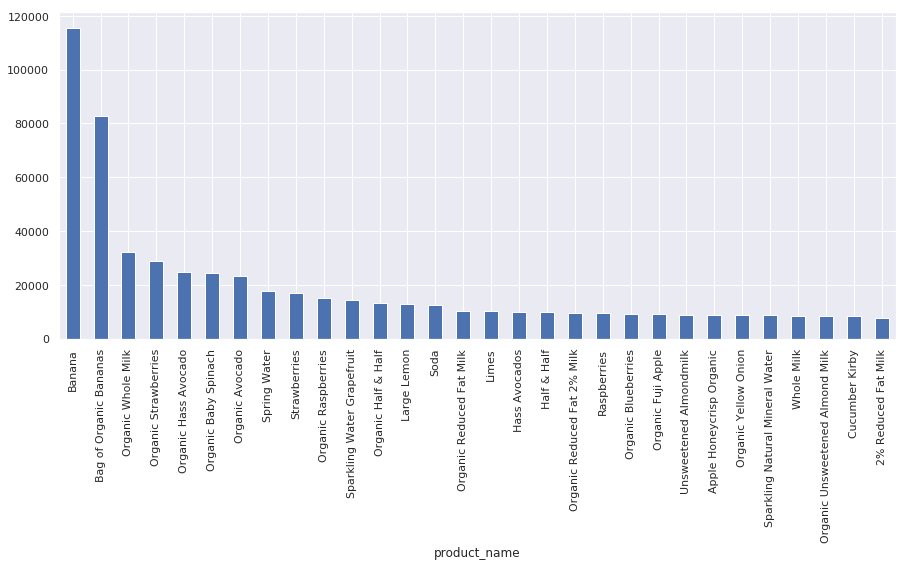

In [26]:
product_first.sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,6))

__Isles and departments__

Which are most popular isles?


In [27]:
popular_aisles = data_all.groupby('aisle')['aisle_id'].count().sort_values(
    ascending=False)
popular_aisles.head(10)

aisle
fresh fruits                     3792661
fresh vegetables                 3568630
packaged vegetables fruits       1843806
yogurt                           1507583
packaged cheese                  1021462
milk                              923659
water seltzer sparkling water     878150
chips pretzels                    753739
soy lactosefree                   664493
bread                             608469
Name: aisle_id, dtype: int64

Which are most popular departments?

In [28]:
popular_depts = data_all.groupby('department')['department_id'].count().sort_values(
    ascending=False)
print(popular_depts.head(5))
print(popular_depts.tail(3))

department
produce       9888378
dairy eggs    5631067
snacks        3006412
beverages     2804175
frozen        2336858
Name: department_id, dtype: int64
department
missing    77396
other      38086
bulk       35932
Name: department_id, dtype: int64


__Reorders__

What is the ratio of reordered items?



In [29]:
reorderered_ratio = data_all['reordered'].aggregate('sum')/data_all['reordered'].aggregate('count')
print('reorder average ratio is ', reorderered_ratio)

reorder average ratio is  0.5900617242809434


In [30]:
reordered_prop = (data_all.groupby('product_id')['reordered'].aggregate('sum')/
             data_all.groupby('product_id')['reordered'].aggregate('count'))
reordered_prop.head(20)

product_id
1     0.614627
2     0.138298
3     0.738516
4     0.458689
5     0.625000
6     0.375000
7     0.419355
8     0.505618
9     0.521739
10    0.510591
11    0.566038
12    0.509653
13    0.300000
14    0.111111
15    0.166667
16    0.100000
17    0.111111
18    0.587413
19    0.000000
20    0.166667
Name: reordered, dtype: float64

Which are the most reordered items?



In [31]:
reordered_sort = reordered_prop.sort_values(ascending=False)
reordered_sort.head(30)

product_id
6433     0.942029
2075     0.933333
43553    0.923077
27740    0.921569
14609    0.914286
13875    0.911111
39992    0.909091
5868     0.900000
36543    0.898551
26093    0.895522
4212     0.894737
35604    0.894231
38438    0.892857
38251    0.891892
36801    0.888889
31418    0.887097
38529    0.880952
47825    0.880000
25766    0.875000
14725    0.870968
2406     0.870968
10236    0.870229
20598    0.868421
15657    0.866667
5457     0.866667
41046    0.864865
2142     0.864407
35910    0.863636
35496    0.862144
700      0.862069
Name: reordered, dtype: float64

In [32]:
reordered_sort_cutoff = pd.DataFrame(reordered_sort)
reordered_sort_cutoff = reordered_sort_cutoff[reordered_sort_cutoff['reordered'] >= 0.2]
reordered_sort_cutoff.tail()
reordered_sort_cutoff.shape

(38392, 1)

Most reordered products are Row Vegetable Wrapper, Serenity Ultimate Extrema Overnight Pads and the list follows.

For some 38,392 products the reorder ratio is more than 0.2.

__Product ratio by aisle__

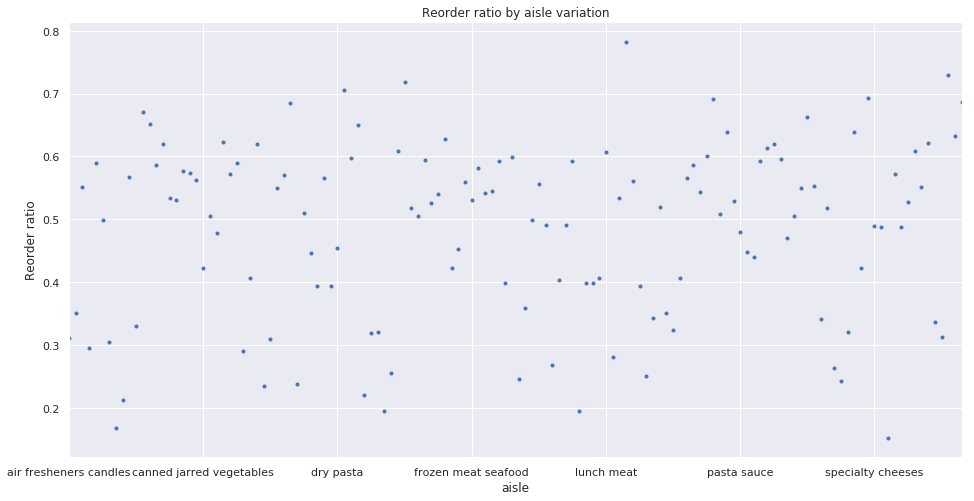

In [33]:
product_aisle = data_all.groupby(['aisle'])['reordered']
product_aisle_ratio = product_aisle.aggregate('mean')

plt.figure(figsize=(16, 8))
plt.xlabel('aisle')
plt.ylabel('Reorder ratio')
plt.title('Reorder ratio by aisle variation')


product_aisle_ratio.plot(marker='.',linestyle='')
plt.show()

__Product ratio by department__

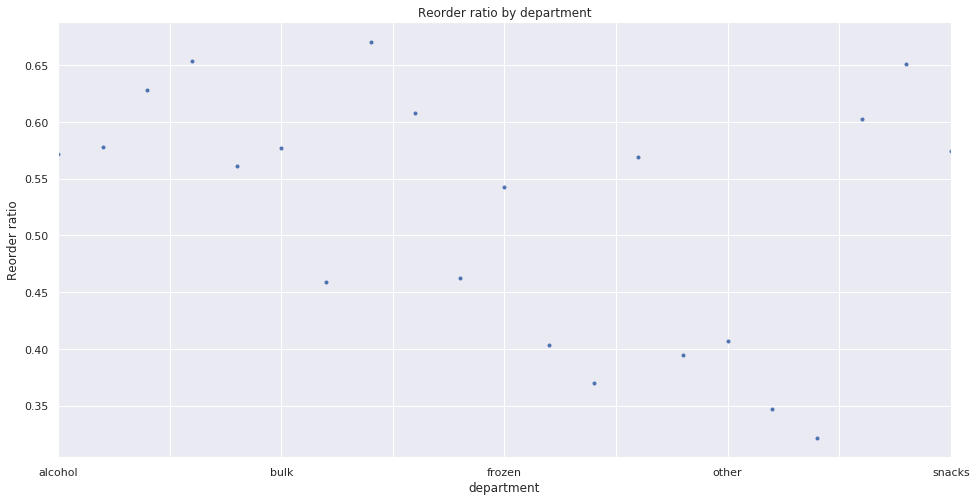

In [34]:
product_dept = data_all.groupby(['department'])['reordered']
product_dept_ratio = product_dept.aggregate('mean')

plt.figure(figsize=(16, 8))
plt.xlabel('department')
plt.ylabel('Reorder ratio')
plt.title('Reorder ratio by department')


product_dept_ratio.plot(marker='.',linestyle='')
plt.show()